In [6]:
%matplotlib inline
import matplotlib.pyplot as plt
import csv
import numpy as np
datafile = '../numpy/trees.txt'

In [7]:
! head $datafile

Index	Girth	Height	Volume
1	8.3	70	10.3
2	8.6	65	10.3
3	8.8	63	10.2
4	10.5	72	16.4
5	10.7	81	18.8
6	10.8	83	19.7
7	11	66	15.6
8	11	75	18.2
9	11.1	80	22.6


In [8]:
girths = []
heights = []
volumes = []

with open(datafile, 'r') as csvfile:
    reader = csv.DictReader(csvfile, delimiter='\t')
    
    # skip the first line
    
    for row in reader:
        girths.append(eval(row['Girth']))
        heights.append(eval(row['Height']))
        volumes.append(eval(row['Volume']))

In [9]:
len(heights)

31

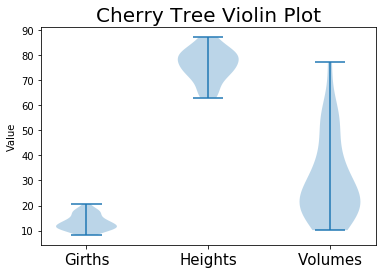

In [10]:
pos = [1, 2, 3]
data = [girths, heights, volumes]
plt.figure()
plt.violinplot(data, pos, widths=0.5)

my_xticks = ['Girths','Heights','Volumes']
plt.xticks(pos, my_xticks, fontsize=15)



plt.title("Cherry Tree Violin Plot", fontsize=20)
plt.ylabel("Value", fontsize=10)
plt.show()

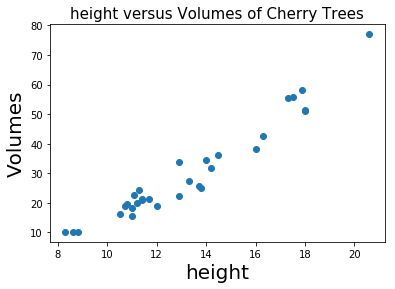

In [11]:
plt.figure()
# plt.xkcd()
plt.scatter(girths, volumes,)
plt.xlabel("height", fontsize=20)
plt.ylabel("Volumes", fontsize=20)
plt.title("height versus Volumes of Cherry Trees", fontsize=15)
plt.show()

In [12]:
# !head $datafile

In [13]:
np_data = np.array([girths, heights])

In [14]:
np_data.shape

(2, 31)

In [15]:
np_data[0]

array([ 8.3,  8.6,  8.8, 10.5, 10.7, 10.8, 11. , 11. , 11.1, 11.2, 11.3,
       11.4, 11.4, 11.7, 12. , 12.9, 12.9, 13.3, 13.7, 13.8, 14. , 14.2,
       14.5, 16. , 16.3, 17.3, 17.5, 17.9, 18. , 18. , 20.6])

In [16]:
np_data[1]

array([70., 65., 63., 72., 81., 83., 66., 75., 80., 75., 79., 76., 76.,
       69., 75., 74., 85., 86., 71., 64., 78., 80., 74., 72., 77., 81.,
       82., 80., 80., 80., 87.])

In [17]:
np_data = np_data.transpose()

In [18]:
np_data.shape

(31, 2)

In [19]:
np_data

array([[ 8.3, 70. ],
       [ 8.6, 65. ],
       [ 8.8, 63. ],
       [10.5, 72. ],
       [10.7, 81. ],
       [10.8, 83. ],
       [11. , 66. ],
       [11. , 75. ],
       [11.1, 80. ],
       [11.2, 75. ],
       [11.3, 79. ],
       [11.4, 76. ],
       [11.4, 76. ],
       [11.7, 69. ],
       [12. , 75. ],
       [12.9, 74. ],
       [12.9, 85. ],
       [13.3, 86. ],
       [13.7, 71. ],
       [13.8, 64. ],
       [14. , 78. ],
       [14.2, 80. ],
       [14.5, 74. ],
       [16. , 72. ],
       [16.3, 77. ],
       [17.3, 81. ],
       [17.5, 82. ],
       [17.9, 80. ],
       [18. , 80. ],
       [18. , 80. ],
       [20.6, 87. ]])

In [20]:
X = np_data

In [21]:
X.shape

(31, 2)

In [22]:
y = np.array(volumes)

(array([ 5., 10.,  4.,  4.,  2.,  0.,  4.,  1.,  0.,  1.]),
 array([10.2 , 16.88, 23.56, 30.24, 36.92, 43.6 , 50.28, 56.96, 63.64,
        70.32, 77.  ]),
 <a list of 10 Patch objects>)

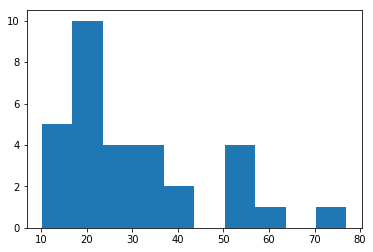

In [23]:
plt.hist(y)

In [33]:
from sklearn.linear_model import PassiveAggressiveRegressor
from sklearn.svm import SVR
reg = PassiveAggressiveRegressor()

In [34]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [35]:
reg.fit(X_train, y_train)

/Users/rusty/.env/dev/lib/python2.7/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.passive_aggressive.PassiveAggressiveRegressor'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


PassiveAggressiveRegressor(C=1.0, average=False, epsilon=0.1,
              fit_intercept=True, loss='epsilon_insensitive',
              max_iter=None, n_iter=None, random_state=None, shuffle=True,
              tol=None, verbose=0, warm_start=False)

In [36]:
predicted = reg.predict(X_test)
expected = y_test

In [37]:
predicted

array([24.7559169 , 21.09003078, 17.71462458, 18.42027961, 20.56421364,
       22.15770377, 24.30007634, 21.3152185 ])

In [38]:
expected

array([27.4, 24.9, 10.3, 10.3, 21.3, 22.6, 33.8, 19.9])

In [28]:
plt.scatter(expected, predicted)
plt.plot([0, 100], [0, 100], '-o')
plt.axis('tight')
plt.xlabel('True volume ')
plt.ylabel('Predicted volume ')
print "RMS:", np.sqrt(np.mean((predicted - expected) ** 2))

8

In [29]:
print predicted[0]
print expected[0]

53.187139372566364
51.0


RMS: 4.5467824585935315


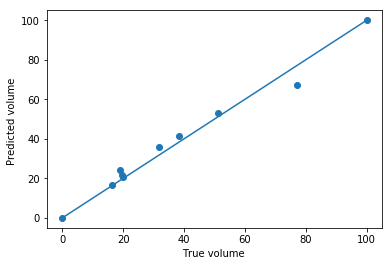

In [30]:
plt.scatter(expected, predicted)
plt.plot([0, 100], [0, 100], '-o')
plt.axis('tight')
plt.xlabel('True volume ')
plt.ylabel('Predicted volume ')
print "RMS:", np.sqrt(np.mean((predicted - expected) ** 2))

In [31]:
plt.plot?

In [21]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression()


reg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [58]:
predicted = reg.predict(X_test)
expected = y_test

In [60]:
print "predicted \n", predicted

predicted 
[  6.11530739  20.37503691  32.77413117  49.73053805  21.54154079
  20.02243659  16.44307681  21.54154079]


In [61]:
print "expected \n", expected

expected 
[ 10.3  19.9  27.4  55.7  21.4  18.8  16.4  21. ]


RMS: 2.01472994823


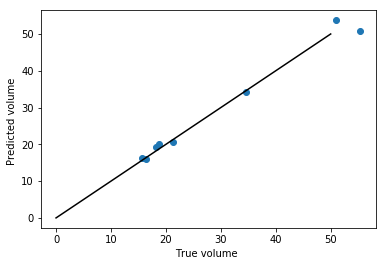

In [23]:
plt.scatter(expected, predicted)
plt.plot([0, 50], [0, 50], '-k')
plt.axis('tight')
plt.xlabel('True volume ')
plt.ylabel('Predicted volume ')
print "RMS:", np.sqrt(np.mean((predicted - expected) ** 2))